In [3]:
import pandas as pd

#read csv as dataframe

df_melody = pd.read_csv('csv_file/all_melody_df.csv')
#remove column 'Unnamed: 0'
df_melody = df_melody.drop(columns=['Unnamed: 0'])

#remove note 'start' and 'end'
df_melody = df_melody[df_melody['note'] != 'start']
df_melody = df_melody[df_melody['note'] != 'end']

#round start time to 2 decimal places
df_melody['start'] = df_melody['start'].round(2)
df_melody



start note  song_num
0       12.72   C#         0
1       12.89   D#         0
2       13.06   F#         0
3       13.22   G#         0
4       13.39   A#         0
...       ...  ...       ...
309418  94.95    C       908
309419  95.23    B       908
309420  95.52    A       908
309421  95.81    B       908
309422  96.10    C       908

[309423 rows x 3 columns]

In [11]:
df_chord = pd.read_csv('../transition__chord_matrix/csv_file/all_chord.csv')
df_chord = df_chord.drop(columns=['Unnamed: 0'])

#round start and end _time
df_chord['start_time'] = df_chord['start_time'].round(2)
df_chord['end_time'] = df_chord['end_time'].round(2)

df_chord.value_counts('chord')

start_time  end_time        chord  song_num
0             0.00      2.72  start_chord         0
1             2.72      4.06        B:maj         0
2             4.06      5.39       C#:maj         0
3             5.39      6.72       Bb:min         0
4             6.72      8.06       Eb:min         0
...            ...       ...          ...       ...
121384       91.48     93.79        C:maj       908
121385       93.79     96.10        G:maj       908
121386       96.10     97.25        C:maj       908
121387       97.25     98.98        C:maj       908
121388       98.98     99.98    end_chord       908

[121389 rows x 4 columns]

In [12]:
#get all unique chord
chord_list = df_chord['chord'].unique()

#get all pitch
pitch_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
#create pd idex is chord_list and columns is pitch_names and fill with 0
df_pitch = pd.DataFrame(0, index=chord_list, columns=pitch_names)

df_pitch


C  C#  D  D#  E  F  F#  G  G#  A  A#  B
start_chord  0   0  0   0  0  0   0  0   0  0   0  0
B:maj        0   0  0   0  0  0   0  0   0  0   0  0
C#:maj       0   0  0   0  0  0   0  0   0  0   0  0
Bb:min       0   0  0   0  0  0   0  0   0  0   0  0
Eb:min       0   0  0   0  0  0   0  0   0  0   0  0
...         ..  .. ..  .. .. ..  .. ..  .. ..  .. ..
F#:maj6      0   0  0   0  0  0   0  0   0  0   0  0
E:maj6       0   0  0   0  0  0   0  0   0  0   0  0
C:dim        0   0  0   0  0  0   0  0   0  0   0  0
Ab:dim       0   0  0   0  0  0   0  0   0  0   0  0
Bb:dim       0   0  0   0  0  0   0  0   0  0   0  0

[111 rows x 12 columns]

In [13]:
#cross over df_melody and  df_chord to get the pitch when the chord is playing

init_song_id = 0
pos = 0
for i in range(len(df_chord)):
    counter = set()

    #data in df_chord
    chord = df_chord.iloc[i]["chord"]
    start_time = df_chord.iloc[i]["start_time"]
    end_time = df_chord.iloc[i]["end_time"]
    song_id = df_chord.iloc[i]["song_num"]
        
    
    df_melody_song = df_melody[df_melody['song_num'] == song_id]


    #if the song is changed, reset the pos
    if (init_song_id != song_id):
        init_song_id = song_id
        pos = 0

    print("Prgress: ", i)

    #check if the note is in the chord plaing time
    for j in range(pos, len(df_melody_song)):
        pos+=1
        if df_melody_song.iloc[j]["start"] >= start_time and df_melody_song.iloc[j]["start"] <= end_time:
            counter.add(df_melody_song.iloc[j]["note"])
        
        if df_melody_song.iloc[j]["start"] > end_time:
            
            #write to df_pitch
            df_pitch.loc[chord][df_melody_song.iloc[j]["note"]] += len(counter)
            break

#save to csv
df_pitch.to_csv('csv_file/all_pitch.csv')
df_pitch

Prgress:  0
Prgress:  1
Prgress:  2
Prgress:  3
Prgress:  4
Prgress:  5
Prgress:  6
Prgress:  7
Prgress:  8
Prgress:  9
Prgress:  10
Prgress:  11
Prgress:  12
Prgress:  13
Prgress:  14
Prgress:  15
Prgress:  16
Prgress:  17
Prgress:  18
Prgress:  19
Prgress:  20
Prgress:  21
Prgress:  22
Prgress:  23
Prgress:  24
Prgress:  25
Prgress:  26
Prgress:  27
Prgress:  28
Prgress:  29
Prgress:  30
Prgress:  31
Prgress:  32
Prgress:  33
Prgress:  34
Prgress:  35
Prgress:  36
Prgress:  37
Prgress:  38
Prgress:  39
Prgress:  40
Prgress:  41
Prgress:  42
Prgress:  43
Prgress:  44
Prgress:  45
Prgress:  46
Prgress:  47
Prgress:  48
Prgress:  49
Prgress:  50
Prgress:  51
Prgress:  52
Prgress:  53
Prgress:  54
Prgress:  55
Prgress:  56
Prgress:  57
Prgress:  58
Prgress:  59
Prgress:  60
Prgress:  61
Prgress:  62
Prgress:  63
Prgress:  64
Prgress:  65
Prgress:  66
Prgress:  67
Prgress:  68
Prgress:  69
Prgress:  70
Prgress:  71
Prgress:  72
Prgress:  73
Prgress:  74
Prgress:  75
Prgress:  76
Prgress: 

C   C#   D   D#    E    F   F#    G   G#    A   A#    B
start_chord    3    1   9    3   20    3    6   15    8    5    5   13
B:maj         28  870  84  688  798   64  828  131  871  230  405  995
C#:maj       362  708  13  939   56  597  535  106  660   65  896  107
Bb:min       339  419   6  666    7  606  263   70  566   17  744   27
Eb:min        90  604  18  692   70  378  367    0  643   13  558  208
...          ...  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
F#:maj6        0    6   0    8    0    2   11    0   14    0    9    5
E:maj6         0    3   0    0    6    0    0    0    4    5    0   15
C:dim         11   21   0    2    0   12    6    0   13    0   16    2
Ab:dim         4    3   5    0   16   10    2    0    0    0    0   10
Bb:dim         9    8   0    7   11    1    1    0   25    4    0   26

[111 rows x 12 columns]

In [4]:
import matplotlib.pyplot as plt
#read as dataframe
df_pitch = pd.read_csv('csv_file/all_pitch.csv')




#change index to Unnamed: 0
df_pitch = df_pitch.set_index('Unnamed: 0')

#remove useless chord 
df_pitch = df_pitch.drop(index=['start_chord', 'end_chord'])
df_pitch['sum'] = df_pitch.sum(axis=1)
df_pitch = df_pitch[df_pitch['sum'] != 0]
df_pitch = df_pitch.drop(columns=['sum'])

#normalize make row sum up to 100%
df_pitch = df_pitch.div(df_pitch.sum(axis=1), axis=0)
#formating
df_pitch = df_pitch.mul(100)
df_pitch = df_pitch.round(2)

df_pitch.sort_index(inplace=True)
df_pitch
#save to csv
df_pitch.to_csv('csv_file/all_pitch_sorted.csv')




In [16]:
#read all_pitch_sorted.csv as dataframe
df_pitch = pd.read_csv('csv_file/all_pitch_sorted.csv')
df_pitch

Unnamed: 0      C     C#      D     D#      E      F     F#      G     G#   
0          A:7   1.29   6.45  32.26   0.00   4.52   9.68  17.42   8.39   1.94  \
1        A:dim  23.08   2.56  15.38  41.03   5.13   2.56   0.00   2.56   2.56   
2        A:maj   1.01   8.60  11.38   2.42  16.49   2.32  18.55   1.91   6.81   
3       A:maj6   0.00   3.12   6.25   0.00  21.88   0.00   6.25   6.25  18.75   
4       A:maj7   0.85  19.57   0.00   6.38  17.87   0.00  32.34   0.00   2.13   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
104     G:maj7   1.16   0.58  13.37   0.00  18.60   0.00  12.21  16.86   0.00   
105      G:min  19.65   0.00  13.63   9.07   1.25  14.71   0.32  17.45   0.48   
106     G:min7  15.54   0.00  17.79   7.52   2.26  14.54   0.00  16.54   1.00   
107     G:sus2   9.35   0.57  17.28   0.57  16.15   6.52   1.13  12.46   0.00   
108     G:sus4  24.48   1.03  21.03   5.17  12.41   3.10   0.00  20.69   0.00   

         A     A#      B  
0    13.55   0.00   4.52  
1     0.00   2.56   2.56  
2    12.70   0.40  17.41  
3     0.00   0.00  37.50  
4    10.64   0.00  10.21  
..     ...    ...    ...  
104  12.79   0.58  23.84  
105  10.17  13.26   0.00  
106   5.76  19.05   0.00  
107  16.43   5.10  14.45  
108   7.24   1.72   3.10  

[109 rows x 13 columns]

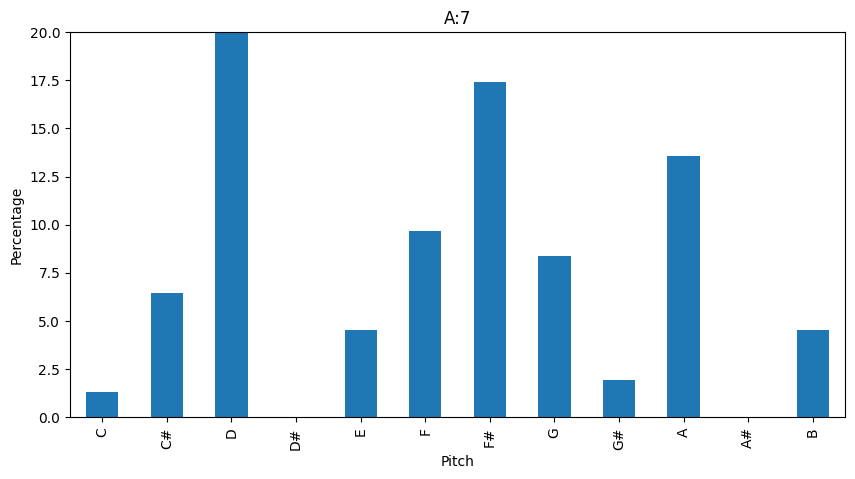

A:7


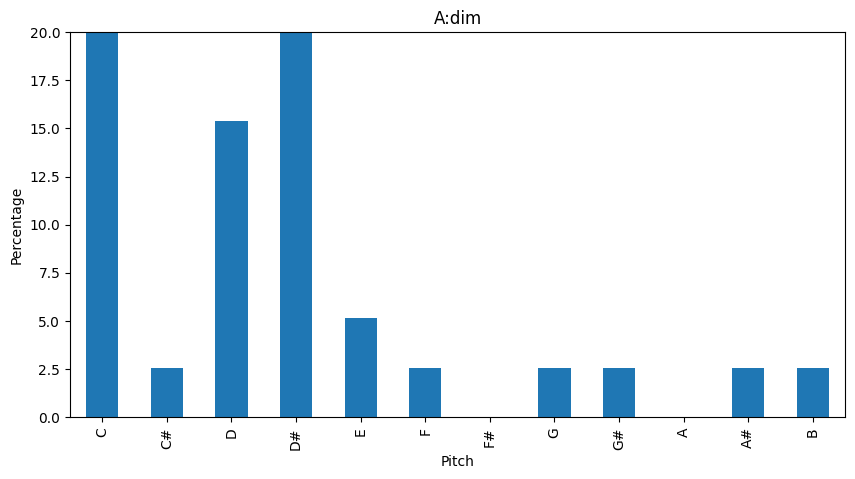

A:dim


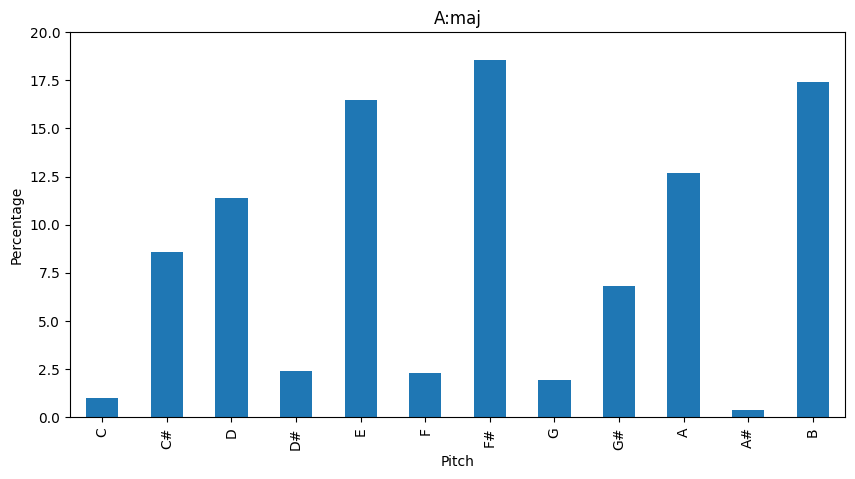

A:maj


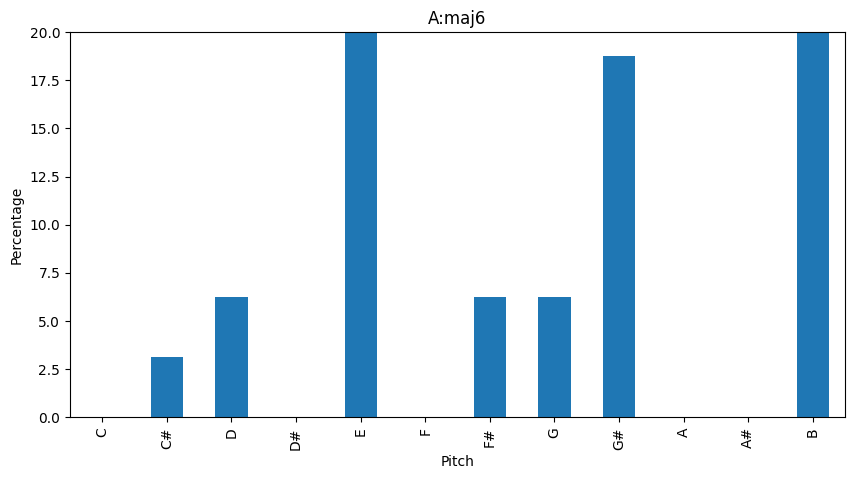

A:maj6


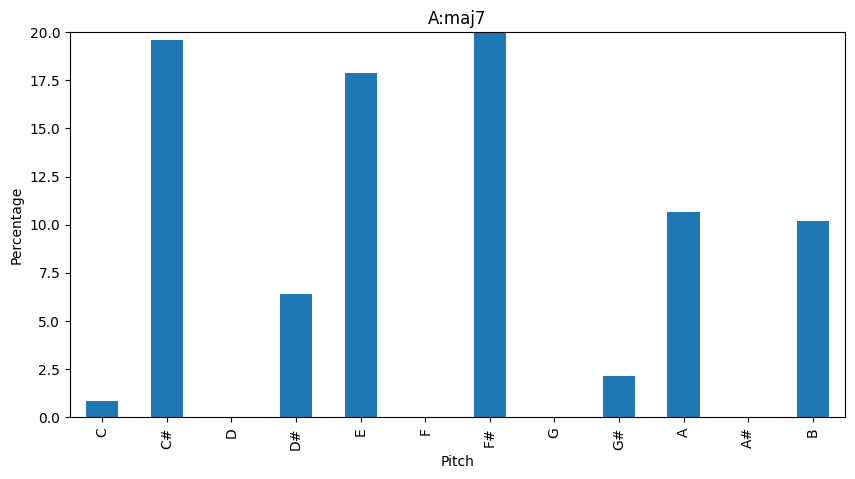

A:maj7


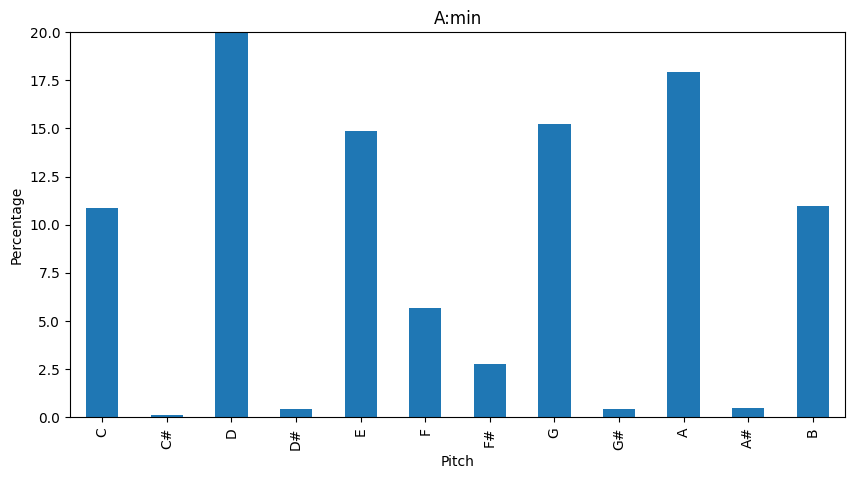

A:min


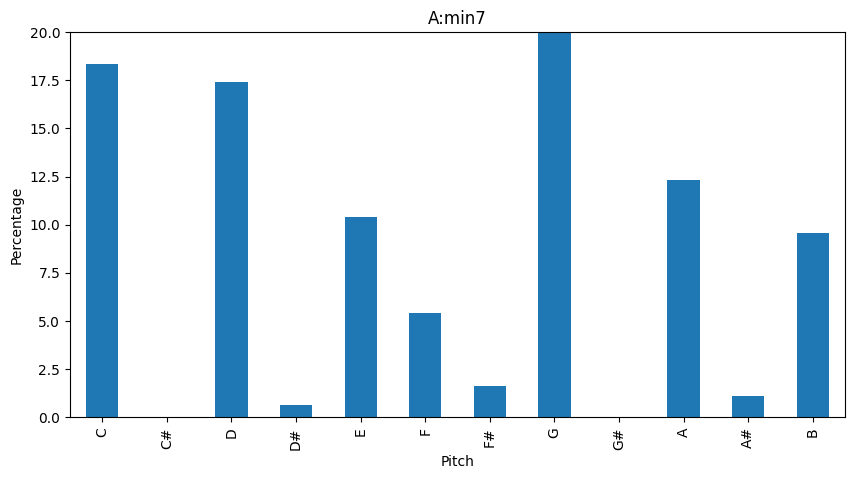

A:min7


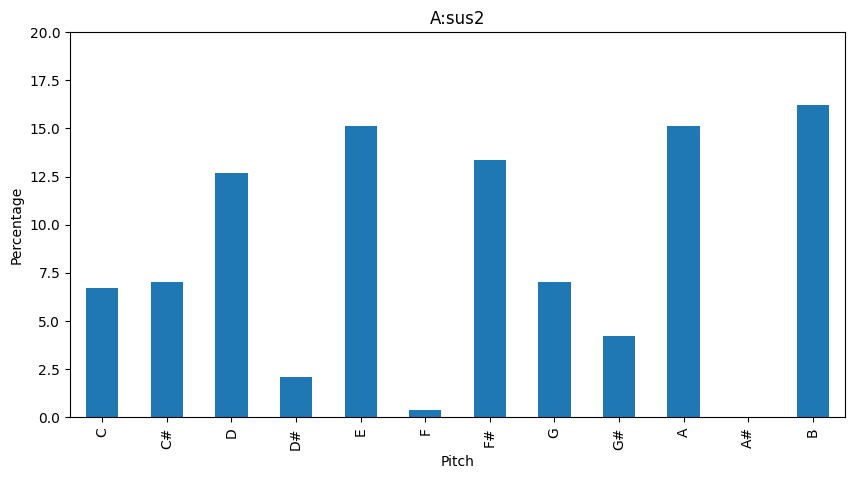

A:sus2


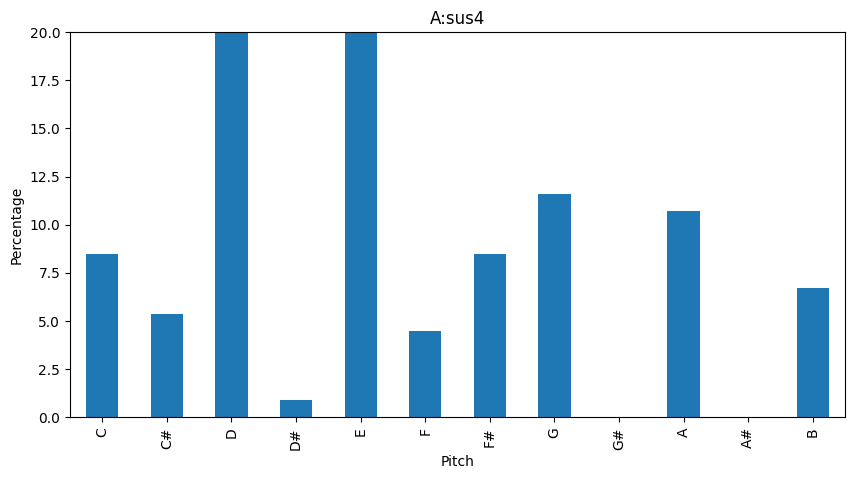

A:sus4


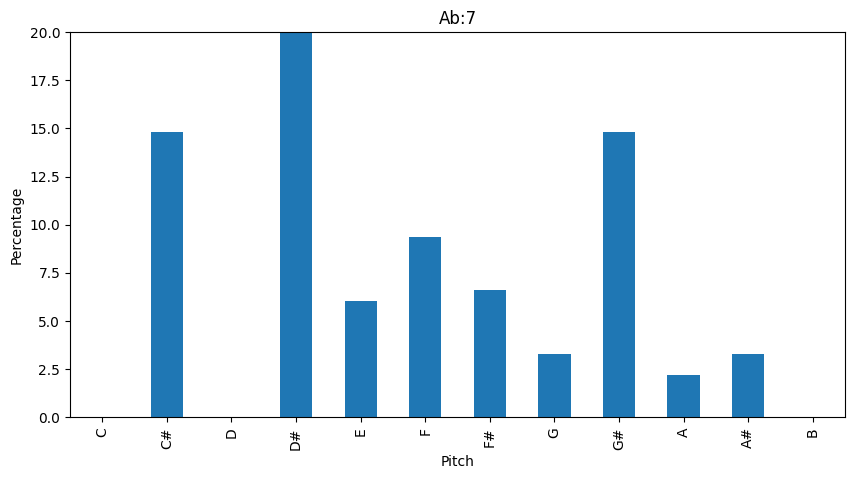

Ab:7


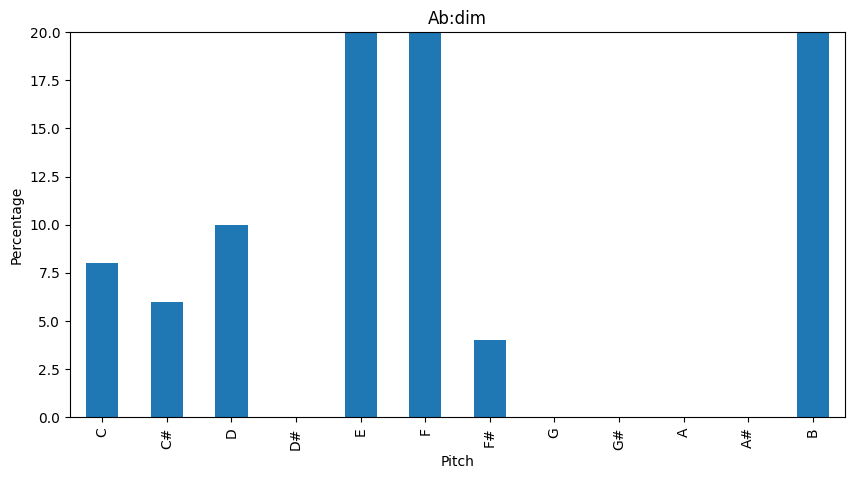

Ab:dim


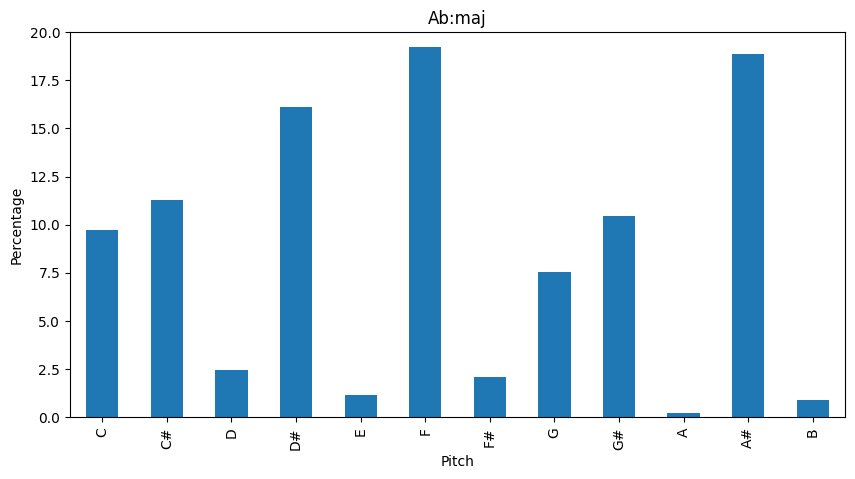

Ab:maj


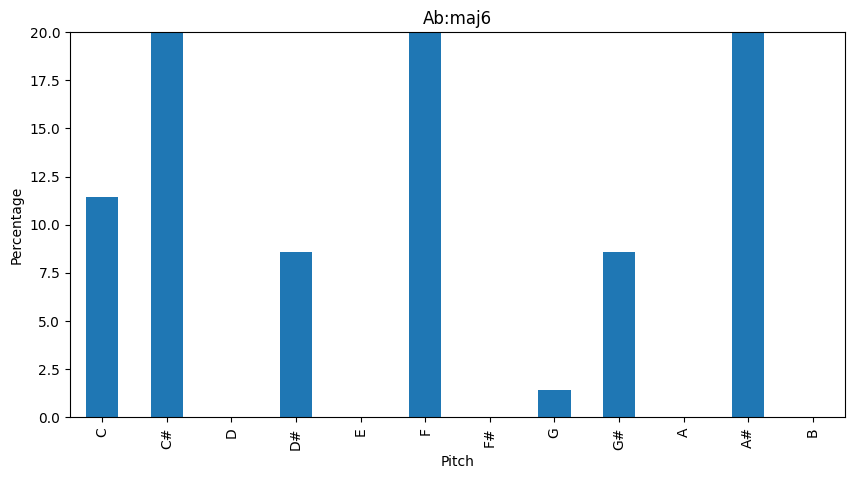

Ab:maj6


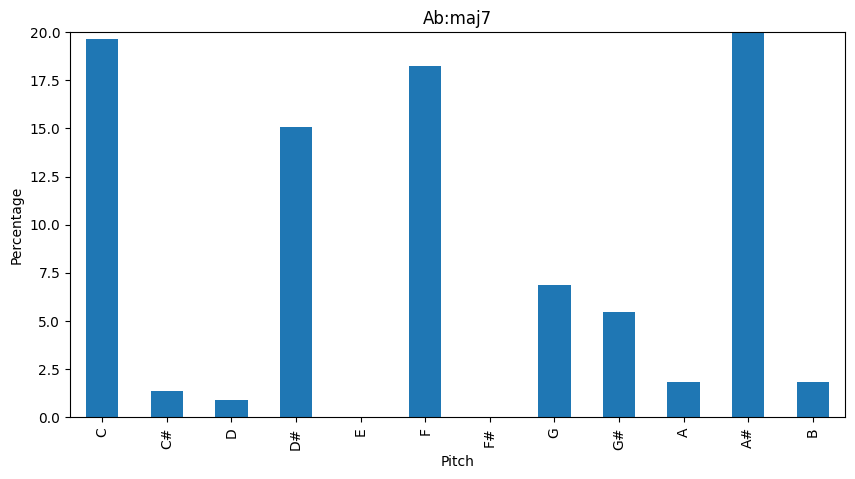

Ab:maj7


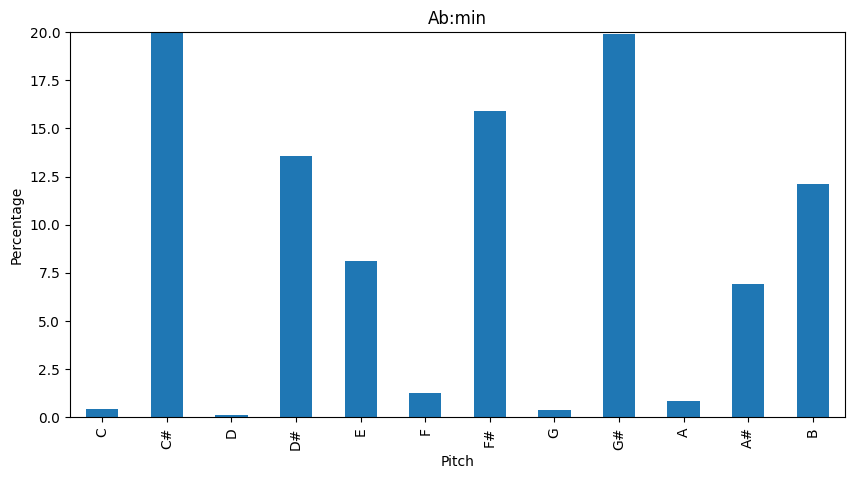

Ab:min


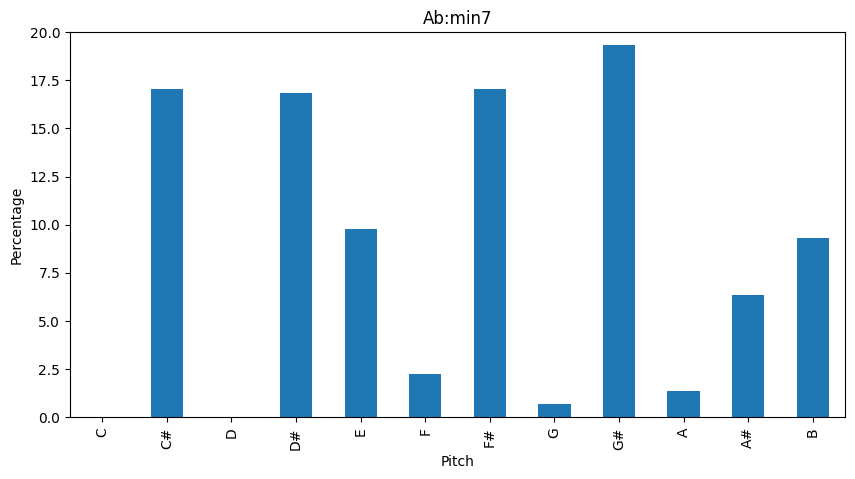

Ab:min7


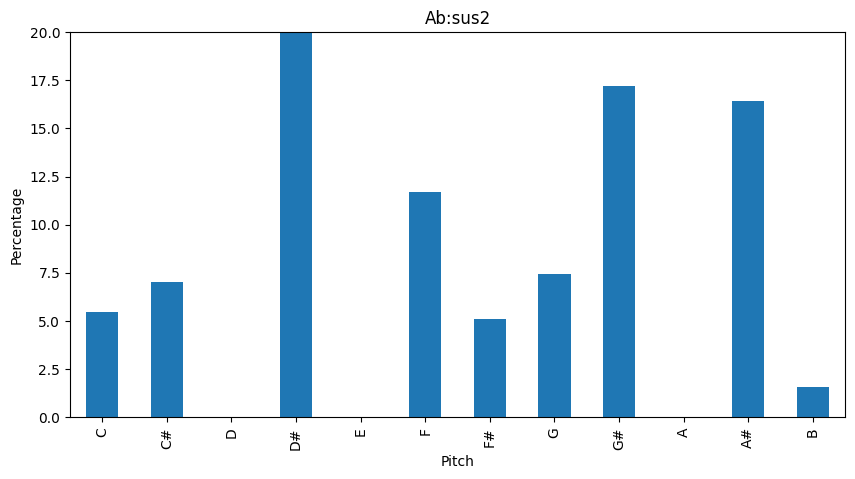

Ab:sus2


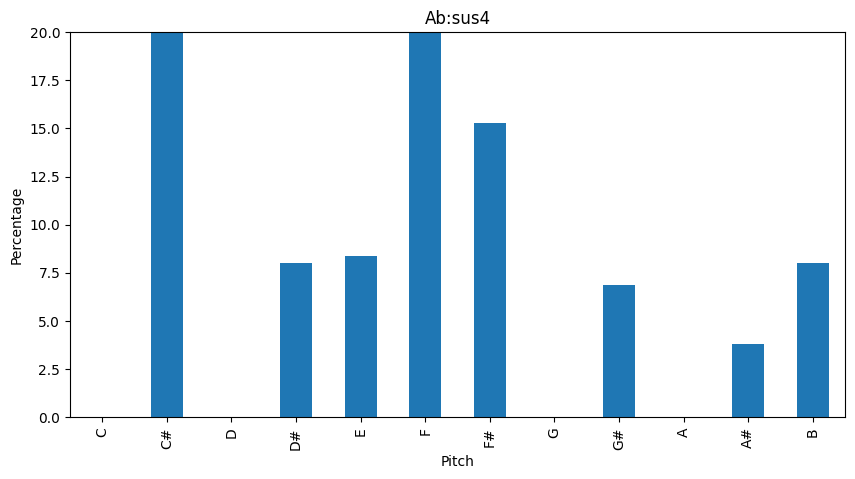

Ab:sus4


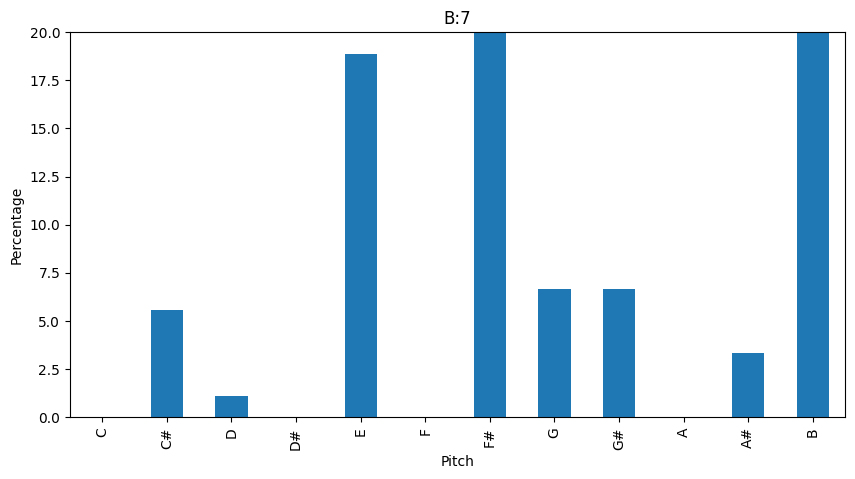

B:7


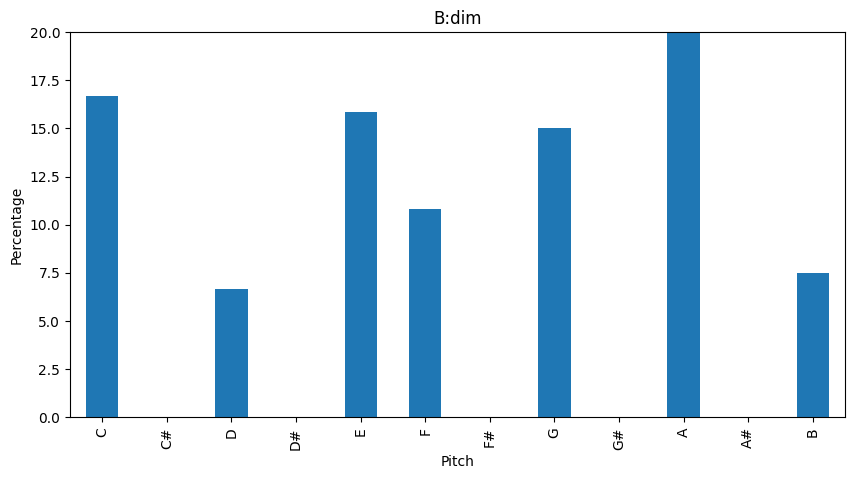

B:dim


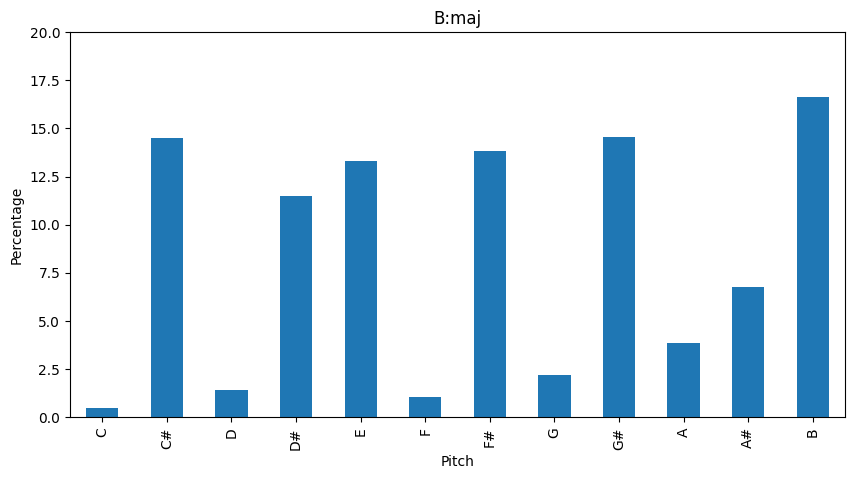

B:maj


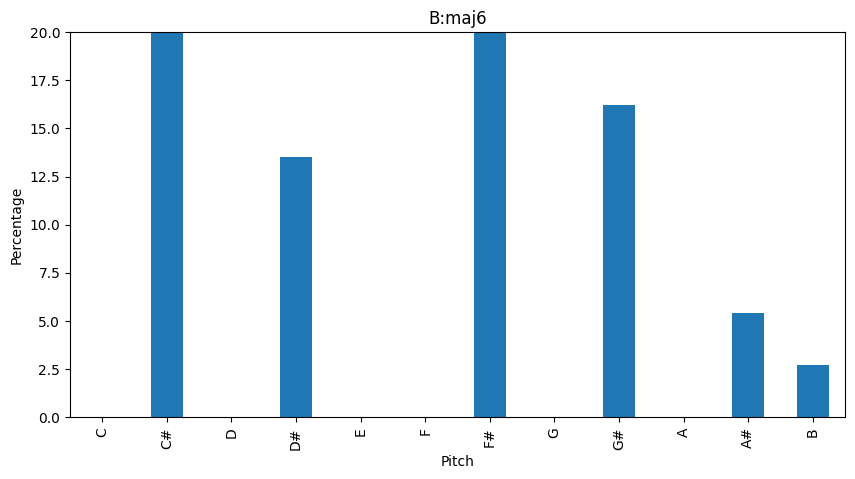

B:maj6


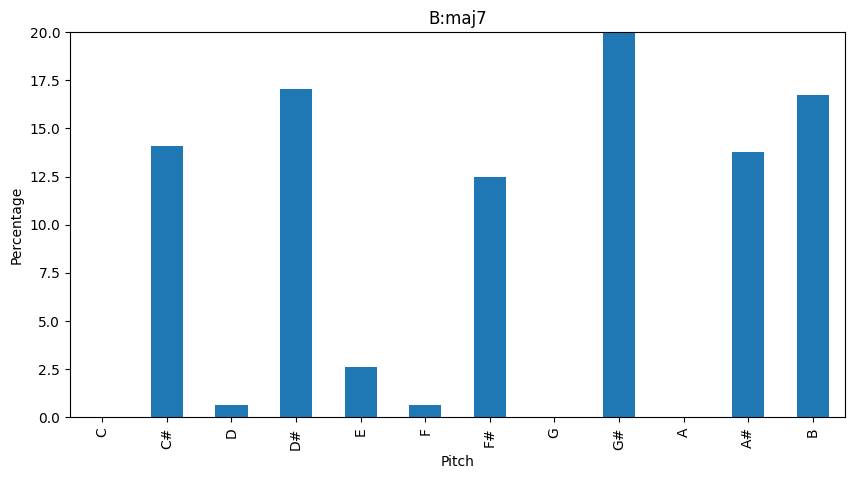

B:maj7


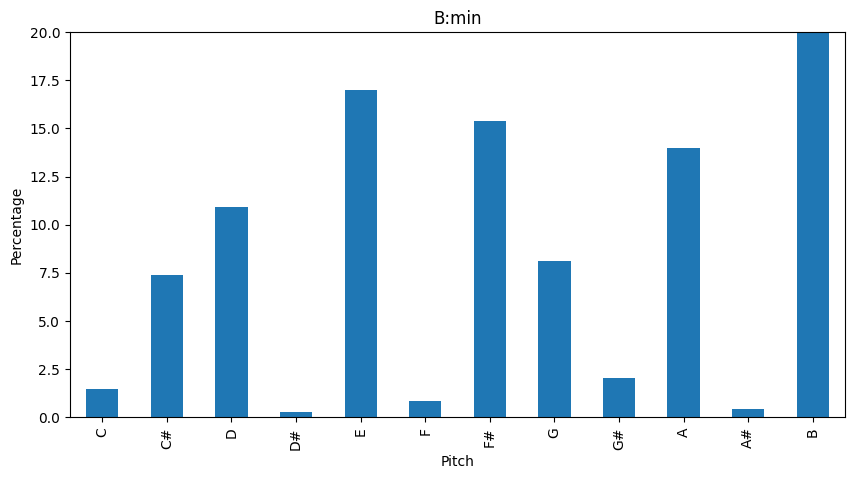

B:min


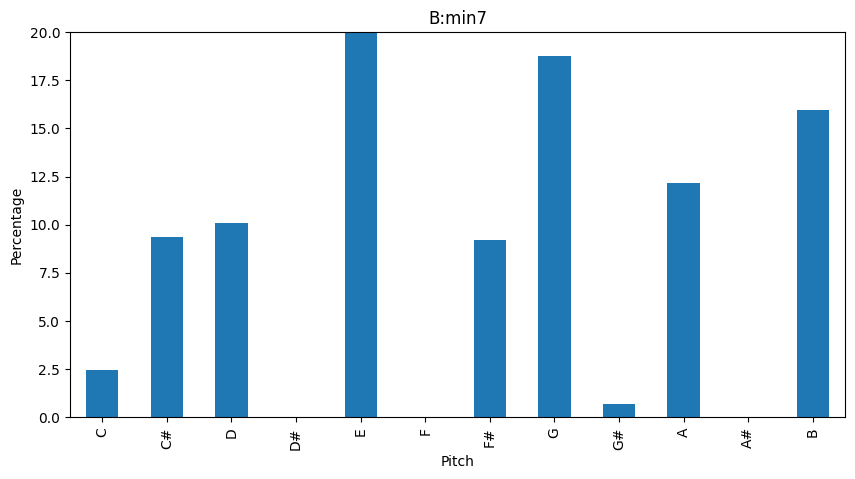

B:min7


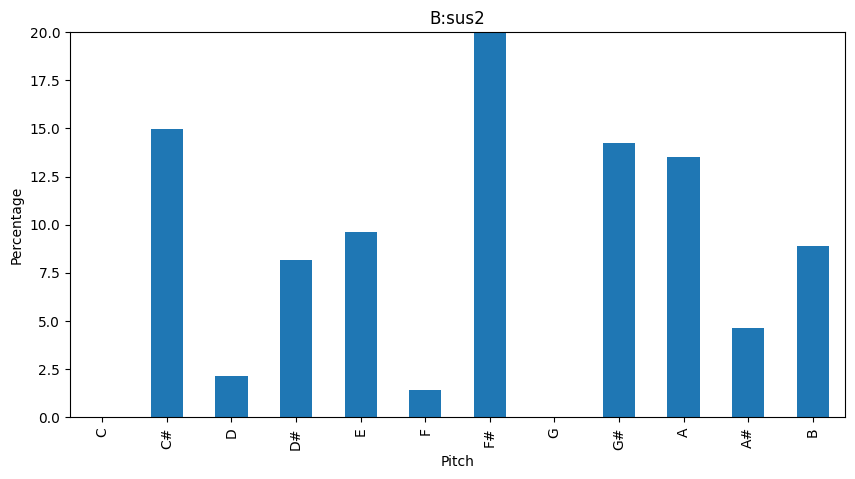

B:sus2


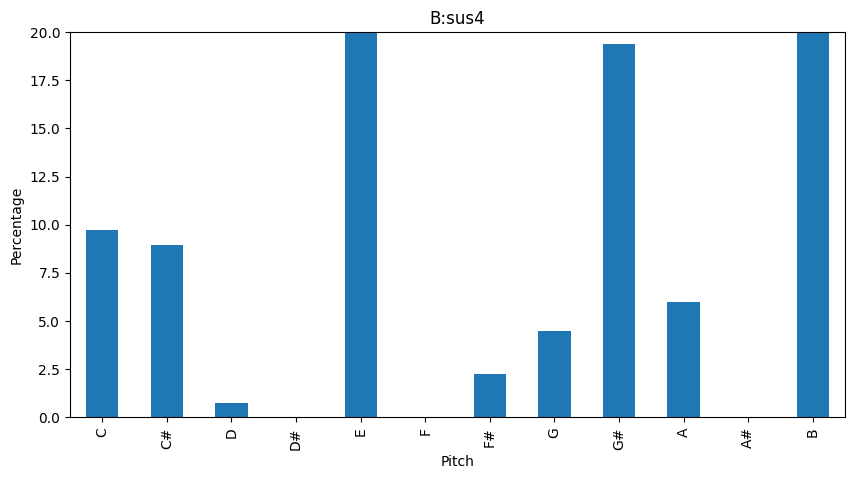

B:sus4


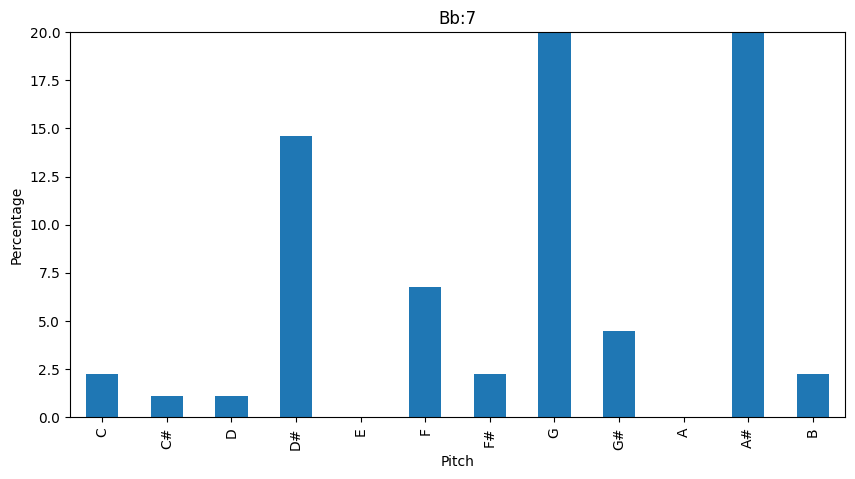

Bb:7


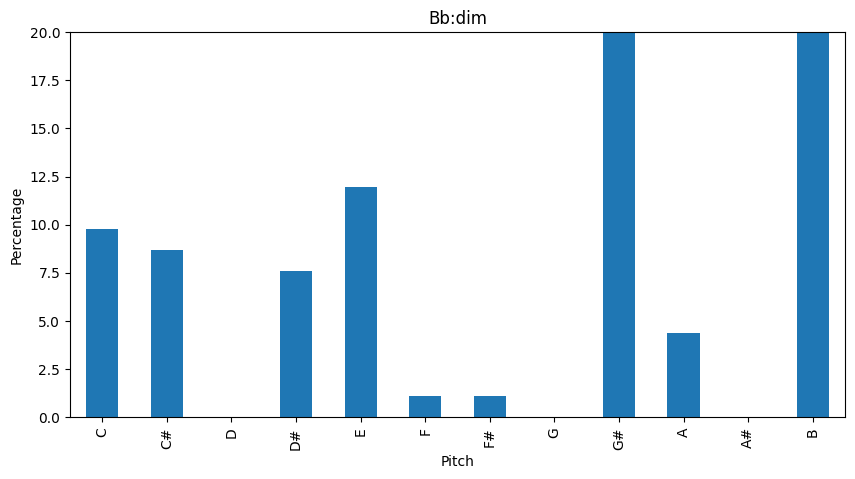

Bb:dim


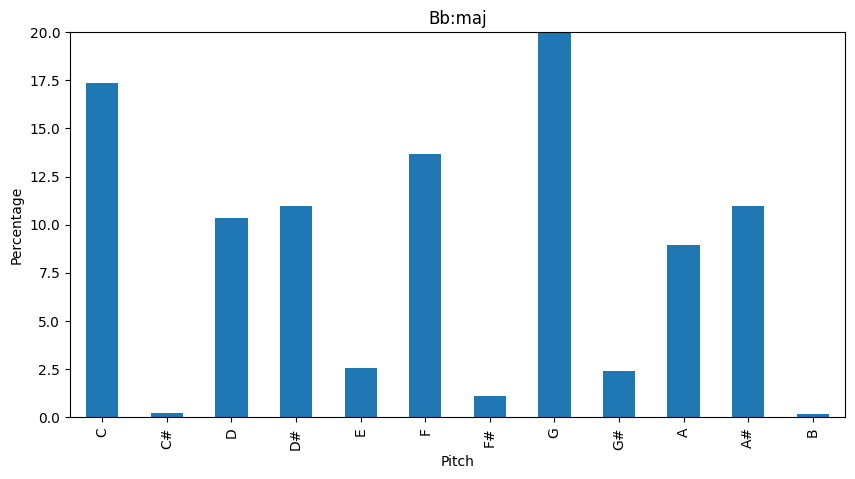

Bb:maj


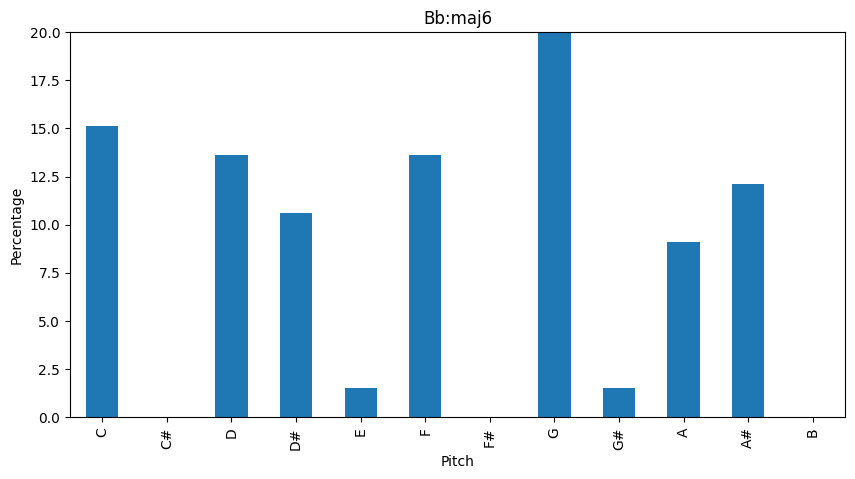

Bb:maj6


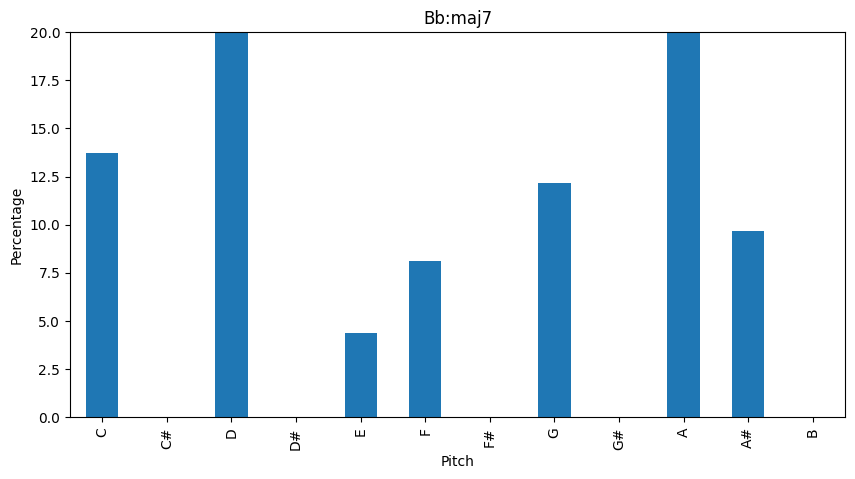

Bb:maj7


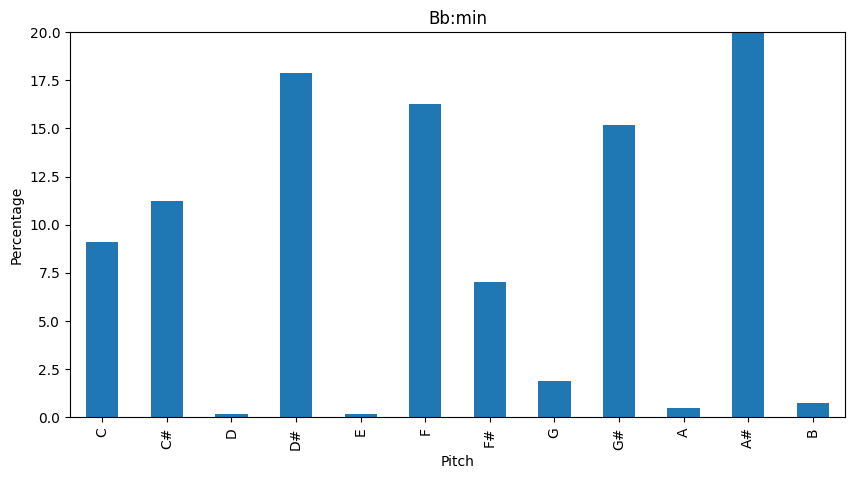

Bb:min


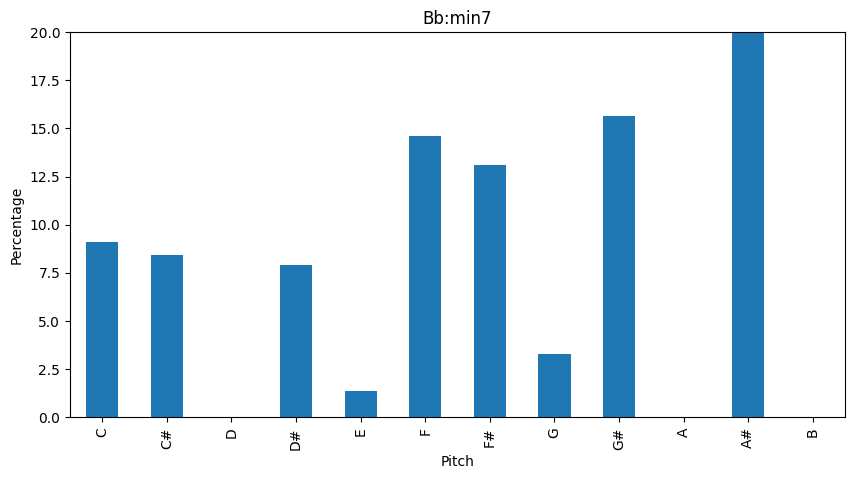

Bb:min7


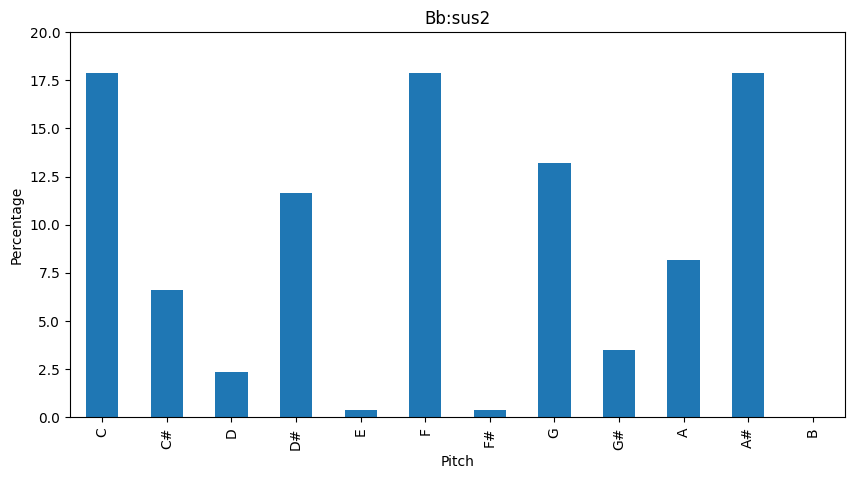

Bb:sus2


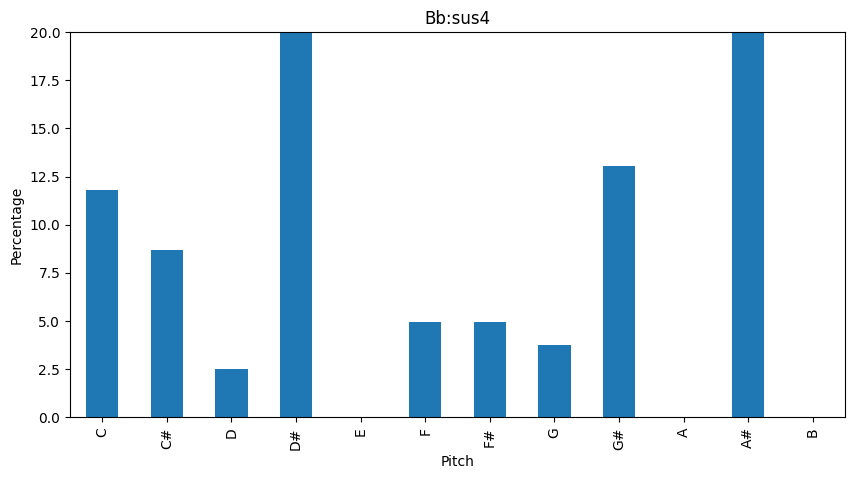

Bb:sus4


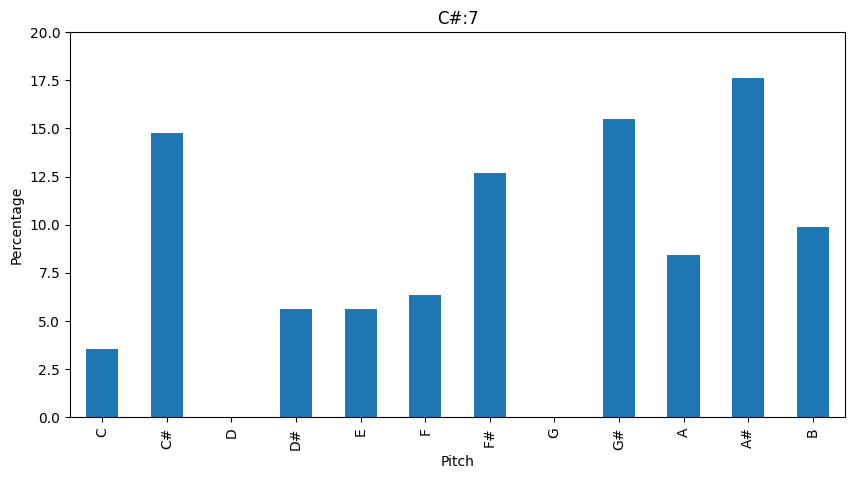

C#:7


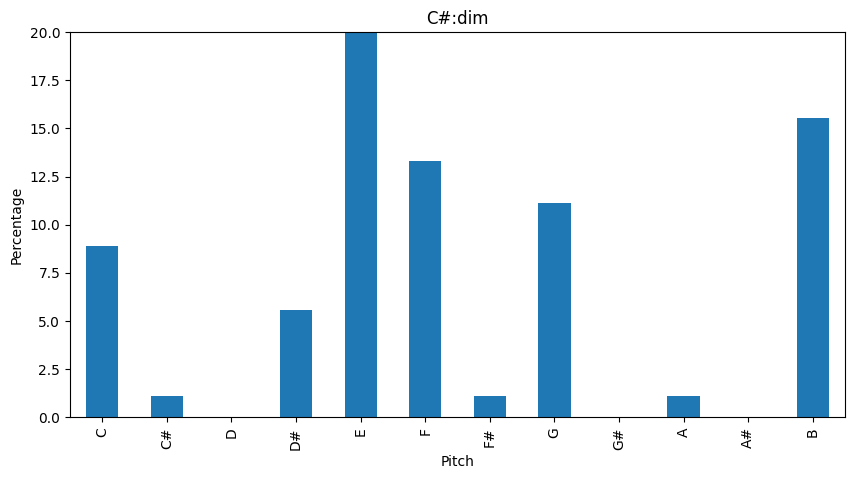

C#:dim


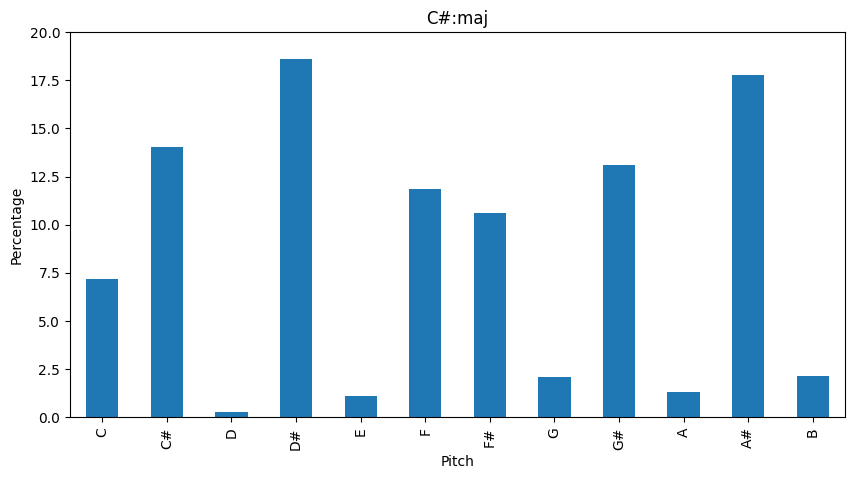

C#:maj


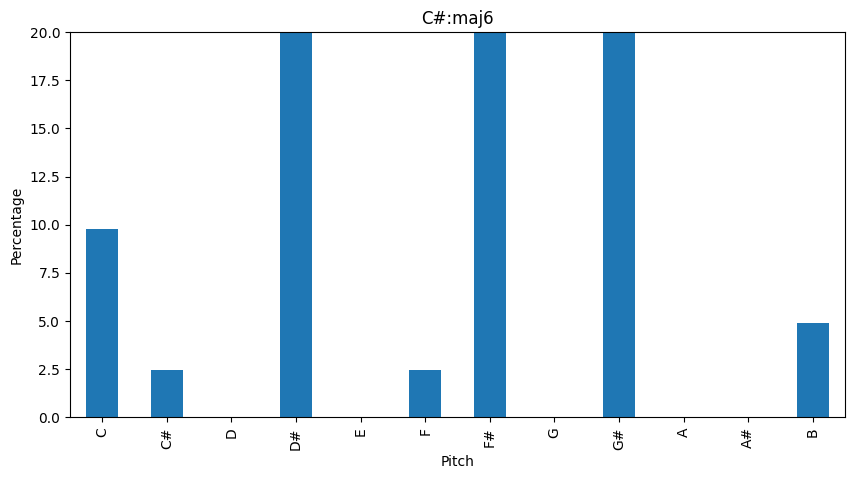

C#:maj6


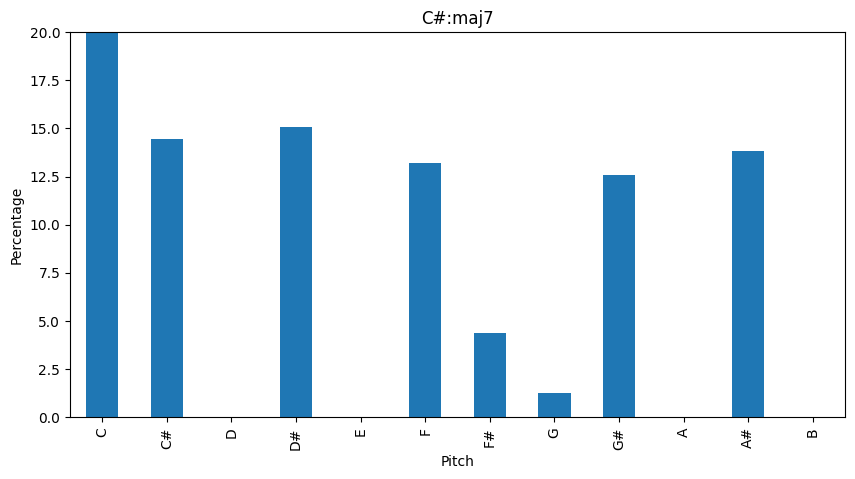

C#:maj7


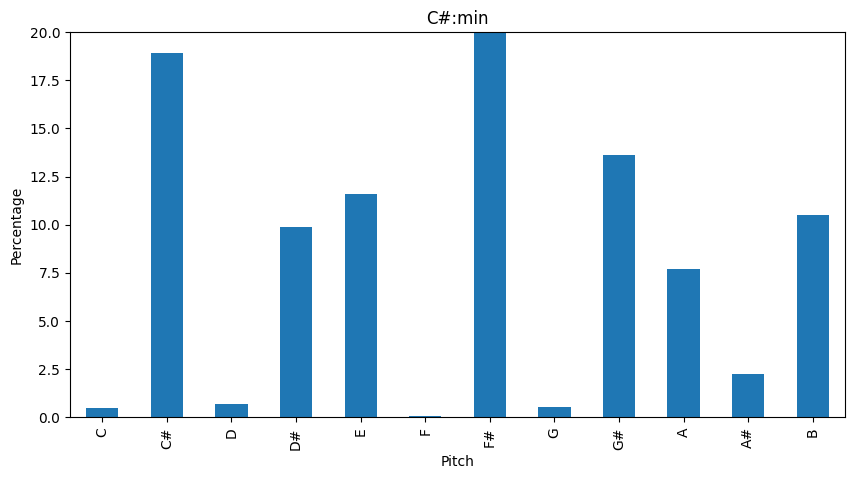

C#:min


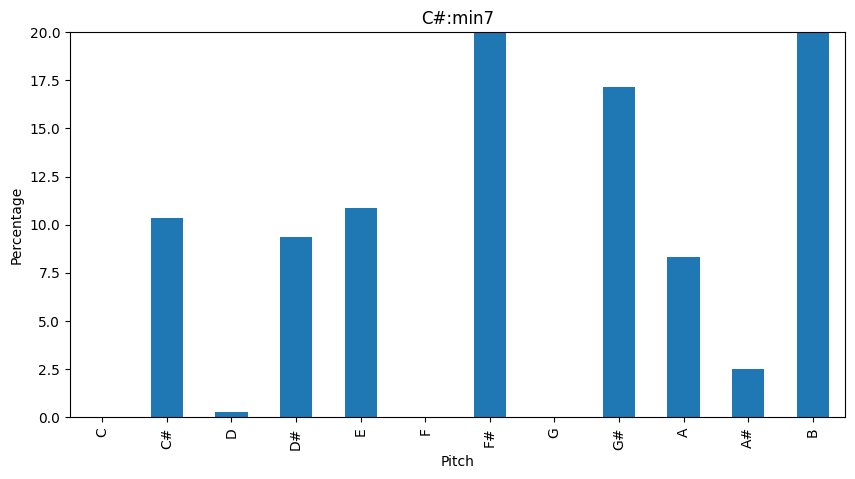

C#:min7


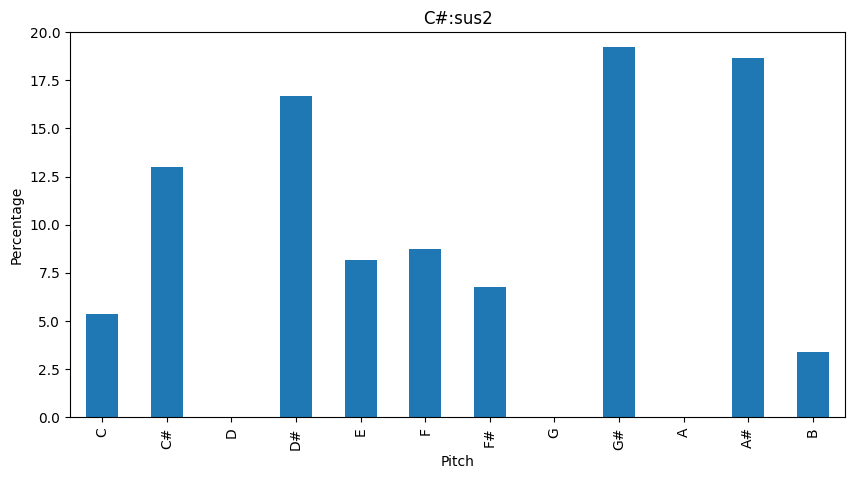

C#:sus2


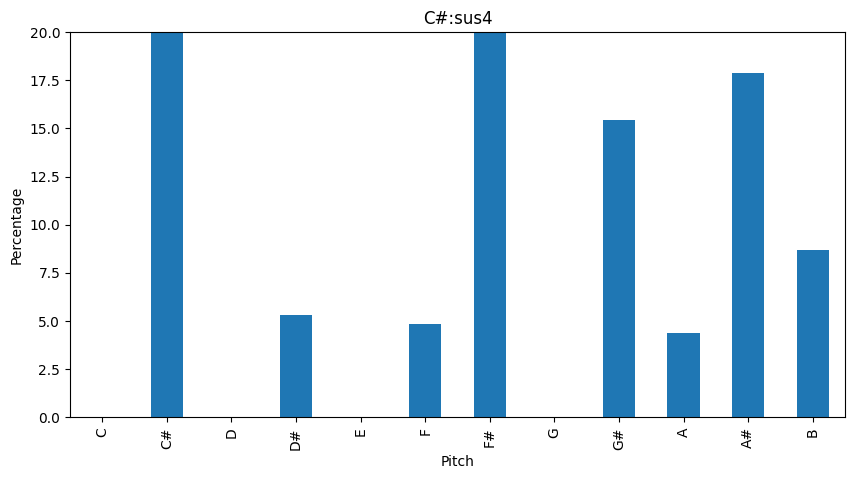

C#:sus4


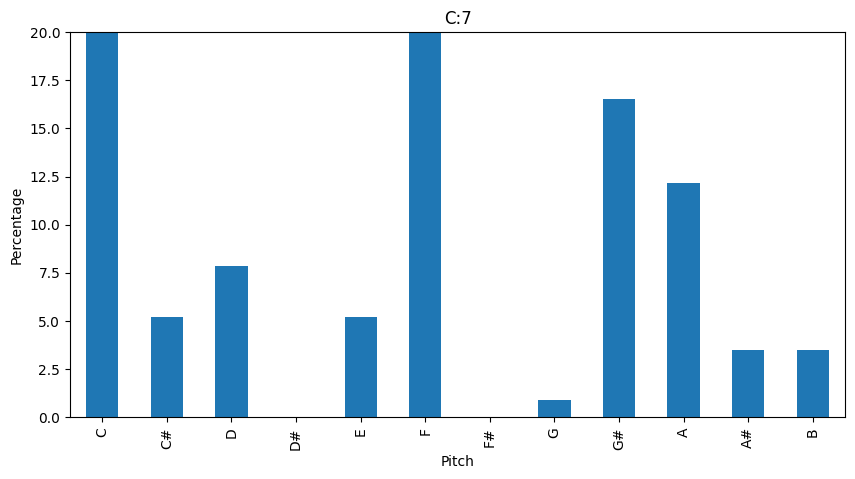

C:7


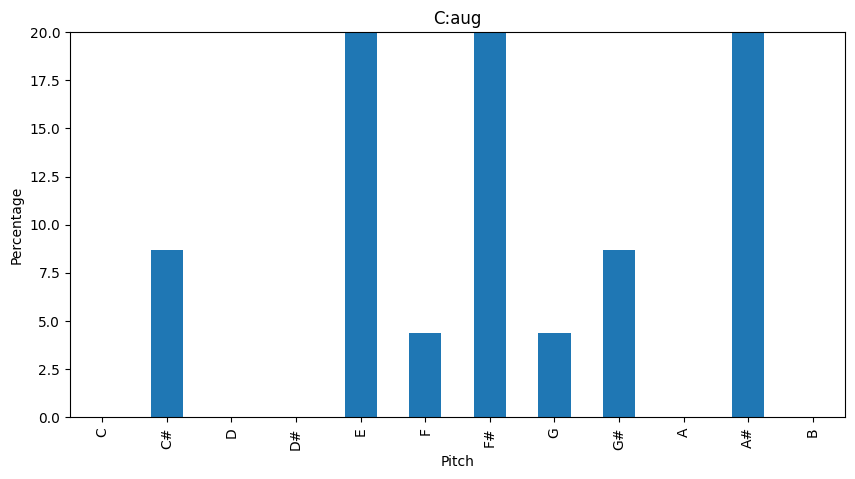

C:aug


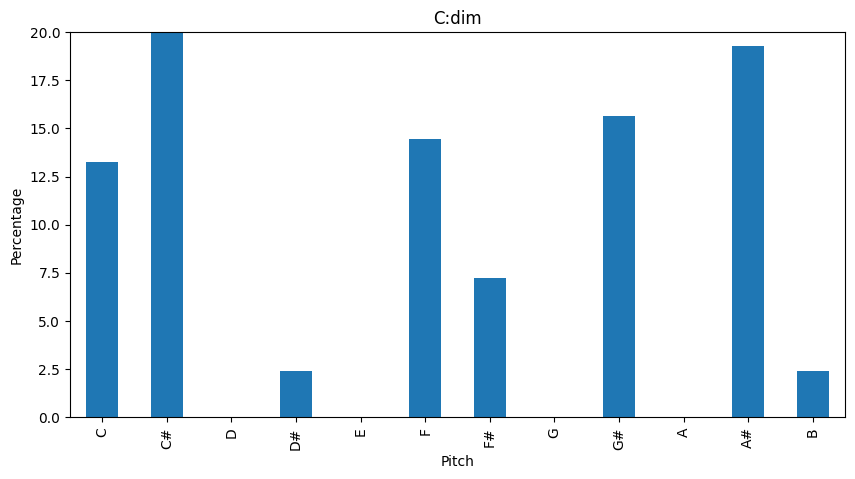

C:dim


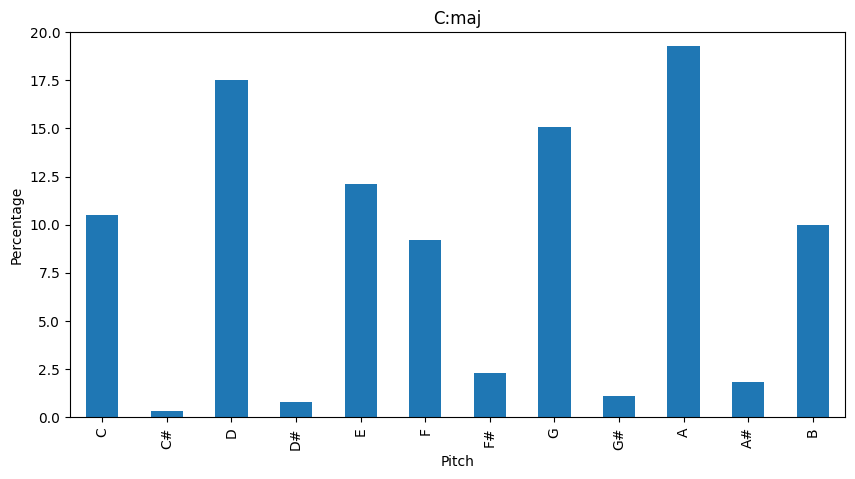

C:maj


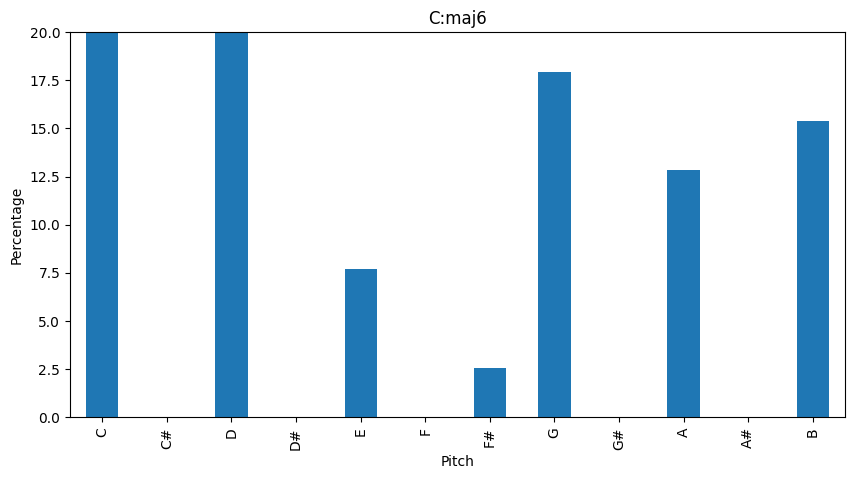

C:maj6


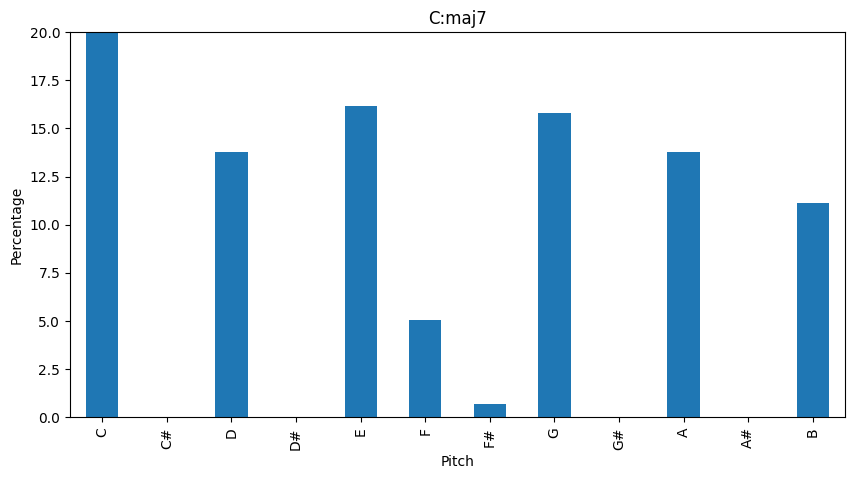

C:maj7


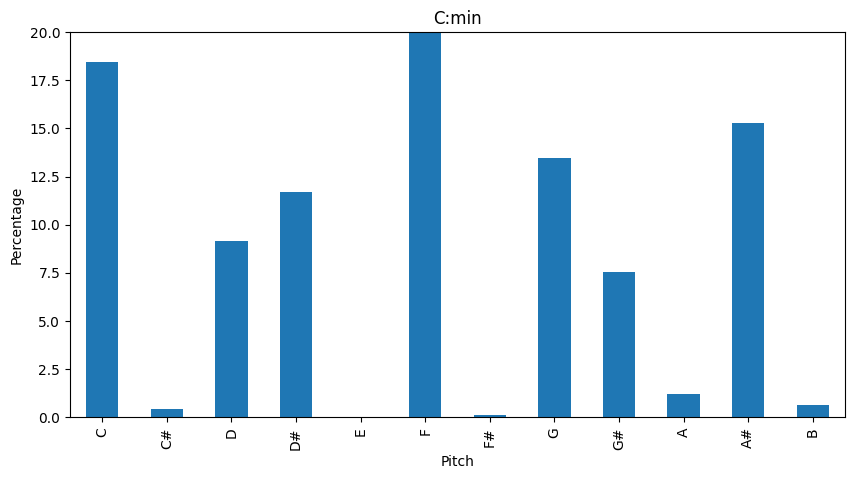

C:min


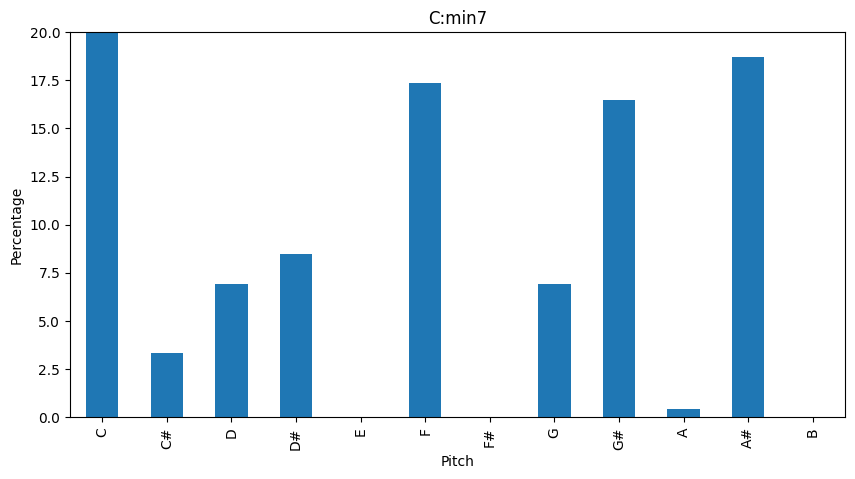

C:min7


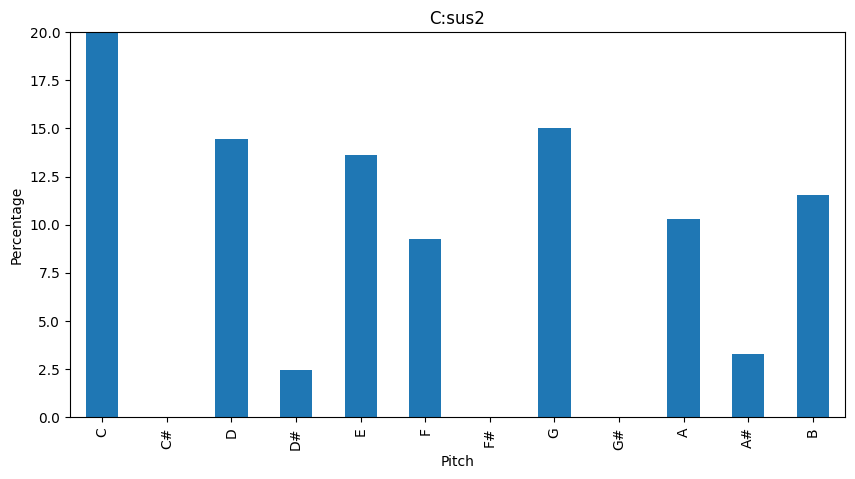

C:sus2


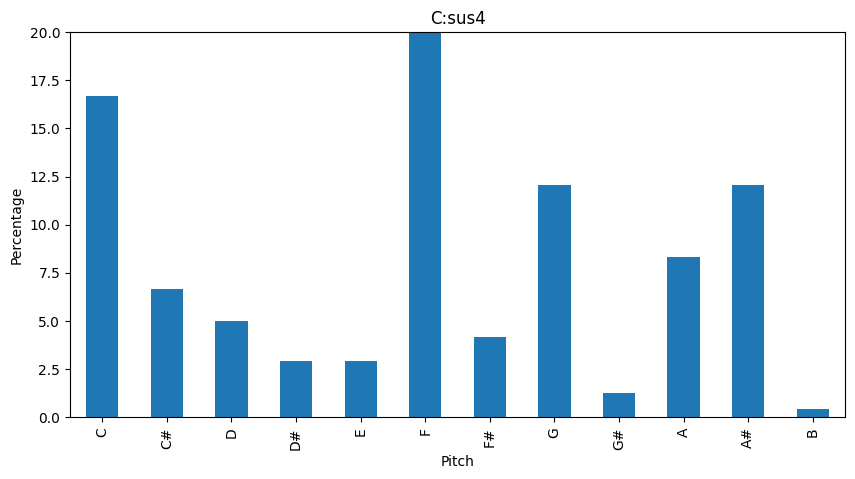

C:sus4


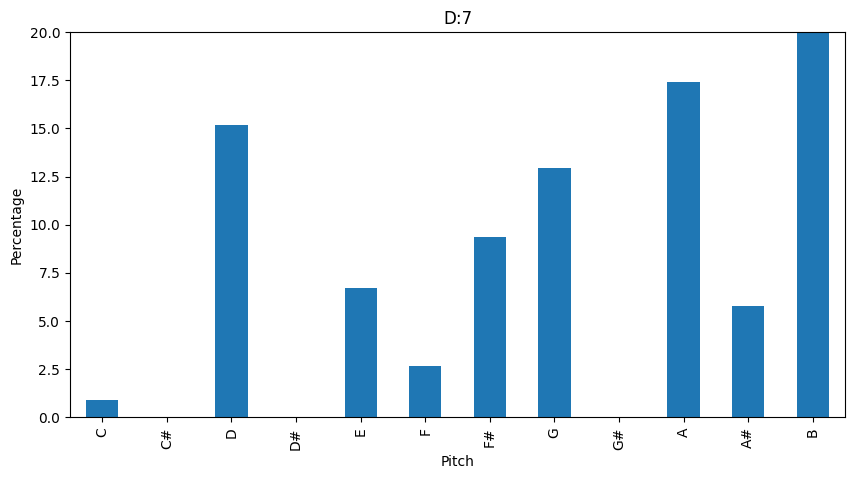

D:7


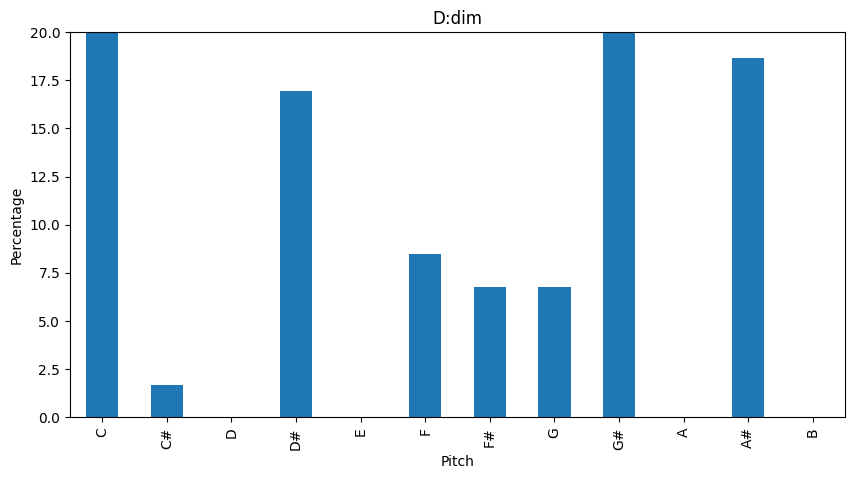

D:dim


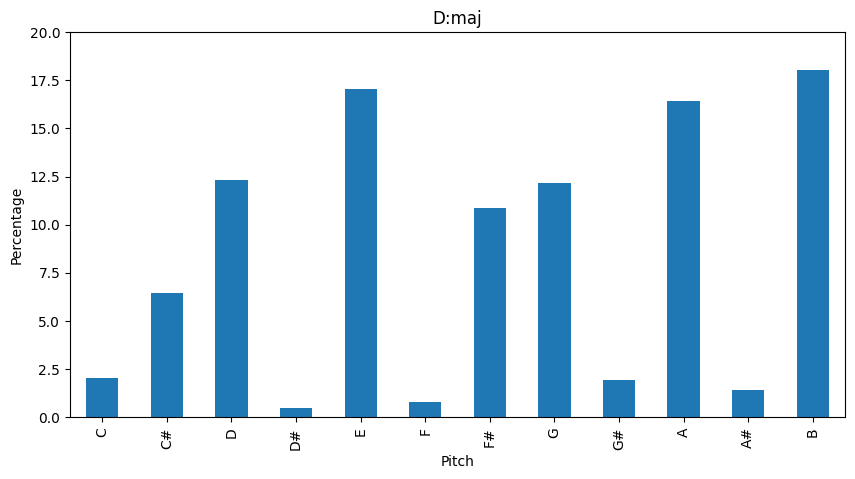

D:maj


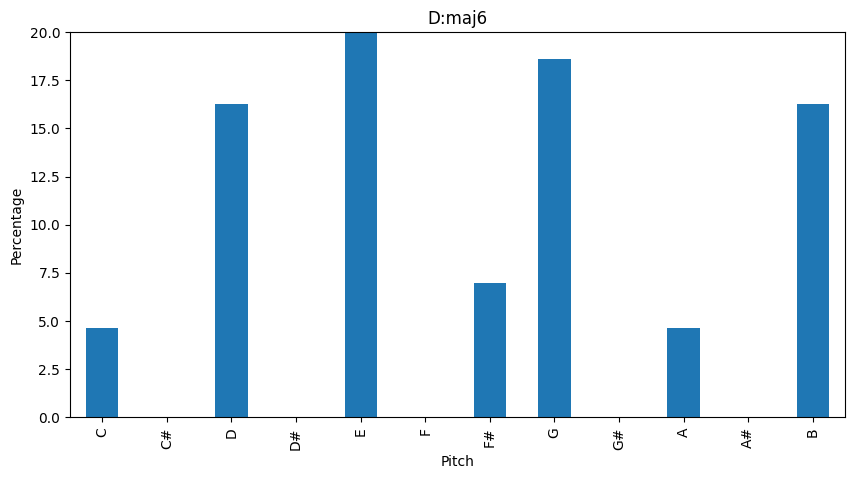

D:maj6


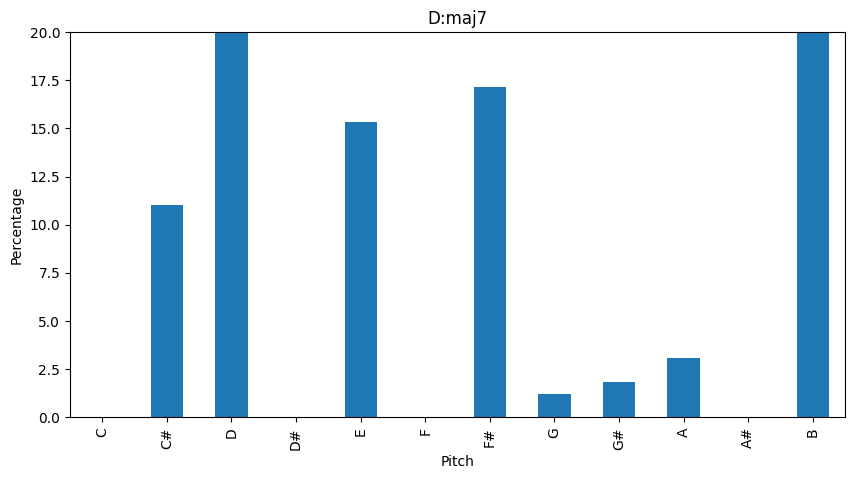

D:maj7


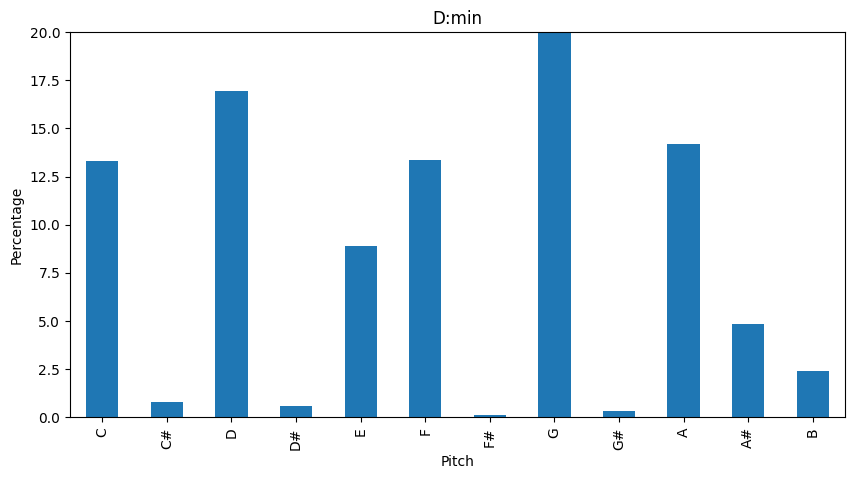

D:min


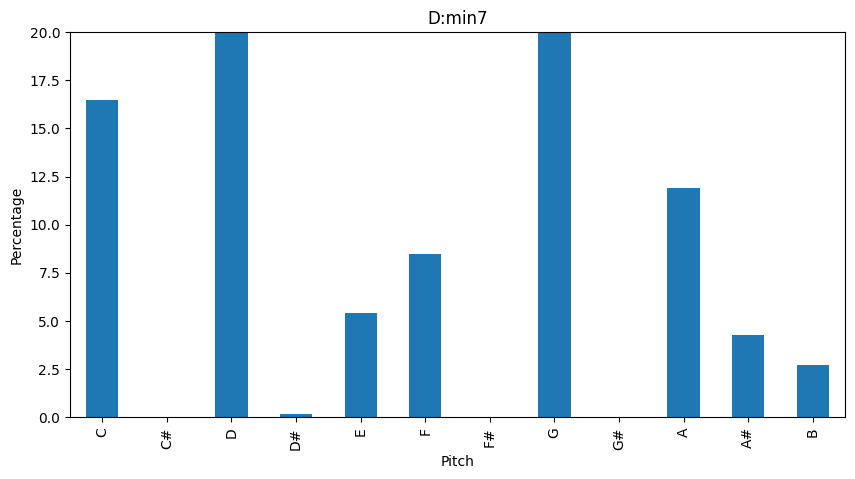

D:min7


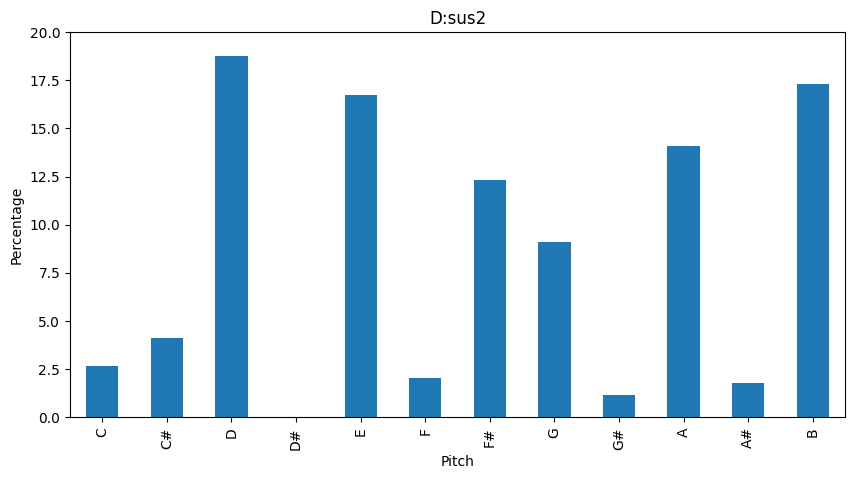

D:sus2


In [7]:
#draw chart for each chord
for i in range(109):




    df_pitch.iloc[i].plot(kind='bar', title=df_pitch.index[i], figsize=(10, 5))
    plt.ylabel('Percentage')
    plt.xlabel('Pitch')
    plt.ylim(0, 20)
    plt.show()
    print(df_pitch.index[i])
df_pitch
